In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [3]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1
999,4.90,10,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


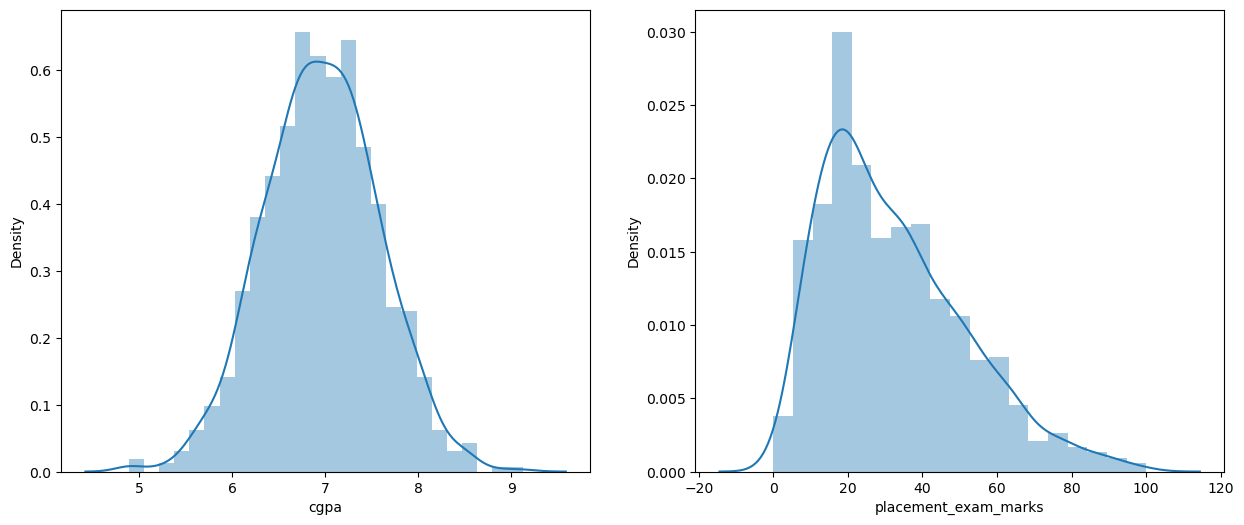

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.distplot(df.cgpa)

plt.subplot(122)
sns.distplot(df.placement_exam_marks)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='placement_exam_marks'>

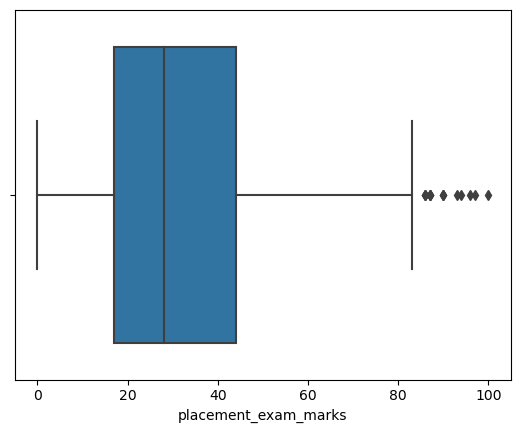

In [6]:
sns.boxplot(df.placement_exam_marks,orient="v")

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='cgpa'>

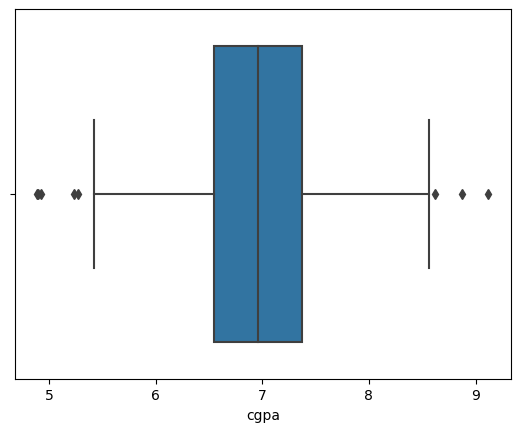

In [7]:
sns.boxplot(df.cgpa,orient="v")

{'whiskers': [<matplotlib.lines.Line2D at 0x1480340bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x148034192e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1480340ba30>],
 'medians': [<matplotlib.lines.Line2D at 0x14803419880>],
 'fliers': [<matplotlib.lines.Line2D at 0x14803419b50>],
 'means': []}

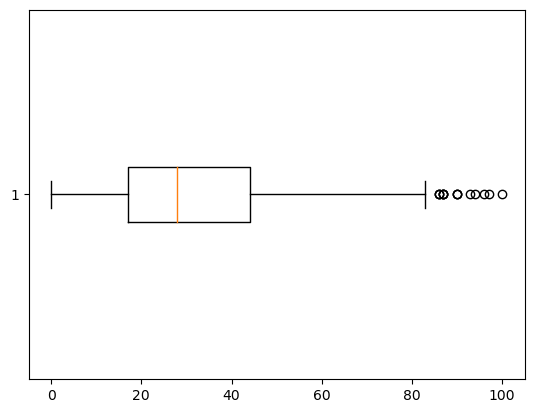

In [8]:
plt.boxplot(df.placement_exam_marks,vert=False)

In [9]:
# checking the oulier

print("highest Allowed:",df['cgpa'].mean()+3*df['cgpa'].std())
print("highest Allowed:",df['cgpa'].mean()-3*df['cgpa'].std())


highest Allowed: 8.808933625397177
highest Allowed: 5.113546374602842


In [10]:
# checking shape
df.shape

(1000, 3)

In [11]:
# finding the outlier
#  less than to greater 8.80 sse kaam or 5.11 se jajyda

df[(df['cgpa']<8.80)|(df['cgpa']>5.11)]

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [12]:
# greater to less   like a 8.80 se jayda or 5.11 se kam


df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [13]:
# trimming the data of outlier

new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


In [14]:
# capping on outlier

upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
upper_limit,lower_limit

(8.808933625397177, 5.113546374602842)

In [15]:
# now applying the capping

df['cgpa']=np.where(df['cgpa']>upper_limit,
                   df['cgpa']<lower_limit,
                   df['cgpa'])

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.94325,0.683893,0.0,6.55,6.955,7.36,8.62
placement_exam_marks,1000.0,32.22500,19.130822,0.0,17.00,28.000,44.00,100.00
placed,1000.0,0.48900,0.500129,0.0,0.00,0.000,1.00,1.00


# IQR BASED FILTERING

# READ THE LOAD THE DATASET

In [17]:

df=pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


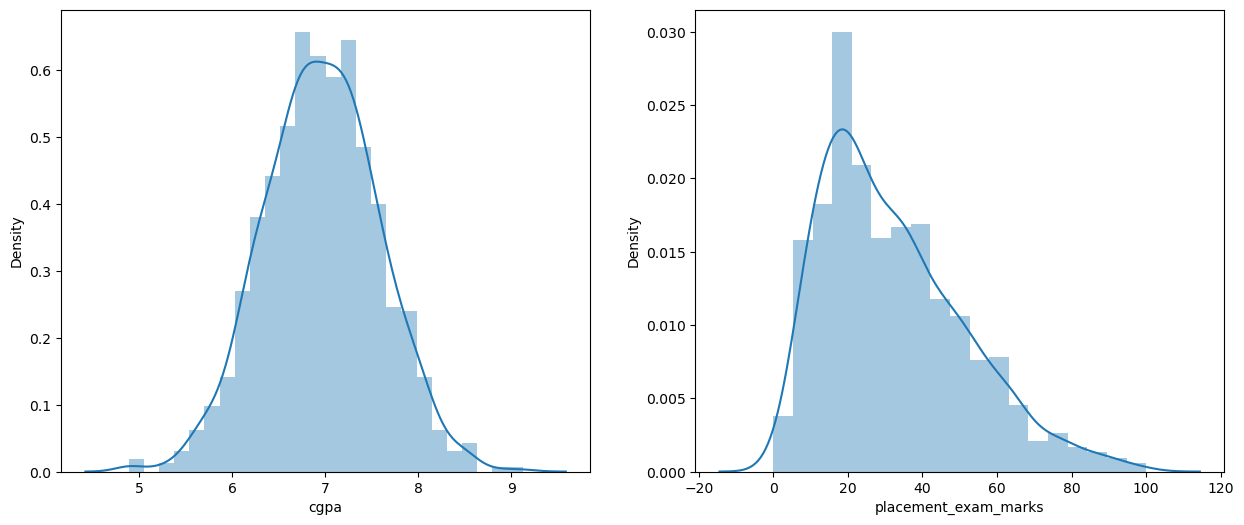

In [18]:
# PLOT THEE DISTRIBUTIONFOR THE FEATURES

plt.figure(figsize=(15,6))

plt.subplot(121)
sns.distplot(df.cgpa)

plt.subplot(122)
sns.distplot(df.placement_exam_marks)
plt.show()

# FORM A BOX PLOT FOR THE SKEWED FEATURE

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

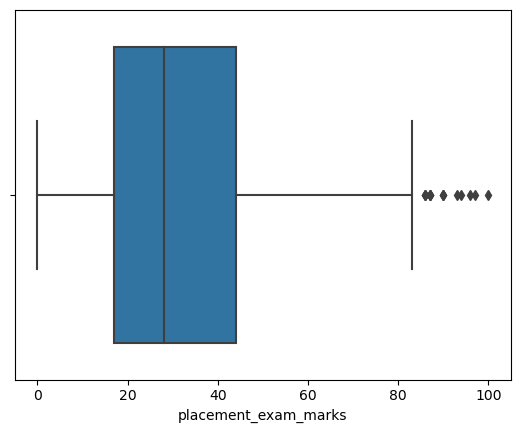

In [34]:
sns.boxplot(df['placement_exam_marks'])

# finding IQR 

In [20]:
# finding upper and lower quiartiles

q1=df['placement_exam_marks'].quantile(0.25)
q3=df['placement_exam_marks'].quantile(0.75)

# finding IQR

IQR=q3-q1
IQR

27.0

# finding upper and lower limits

In [21]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 84.5
lower_limit -23.5


#  FINDING OUTLIER

In [24]:
df[df['placement_exam_marks']>upper_limit]


,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [25]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming the outlier

In [27]:
# new_df1=df[(df['placement_exam_marks']>upper_limit)]
# new_df1

new_df1=df[(df['placement_exam_marks']<upper_limit)&(df['placement_exam_marks']>lower_limit)]
new_df1

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [33]:
new_df2=df[~(df['placement_exam_marks']<upper_limit)&(df['placement_exam_marks']>lower_limit)]
new_df2

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='placement_exam_marks'>

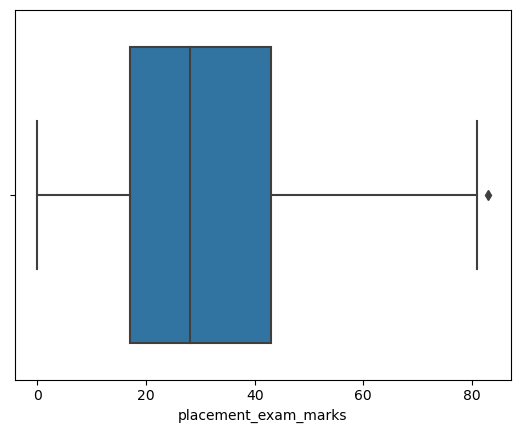

In [30]:
sns.boxplot(new_df1.placement_exam_marks,orient="v")

In [31]:
new_df1.count()

cgpa                    985
placement_exam_marks    985
placed                  985
dtype: int64

In [32]:
new_df1.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64